## Intelligence Artificielle
### Travaux pratiques n°3 <font color='blue'>Apprentissage non-supervisé avec $sklearn$
 </font>

### 2022-2023

---


**Importation des bibliothèques**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import silhouette_score, silhouette_samples

from scipy.cluster.hierarchy import dendrogram, linkage

import warnings
warnings.filterwarnings('ignore')

**Assemblage Google Drive dans Colaboratory**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**1)** 	Importer le jeu de données **clients.csv** dans un dataframe nommé $data\_clients$. Ensuite, afficher les $5$ premières lignes du dataframe $data\_clients$

In [ ]:
data_clients=pd.read_csv('/content/drive/MyDrive/clients.csv', sep=",")
data_clients.head()


,Genre,Age,Annual Income,Spending Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


**2)** 	Créer l’histogramme de distribution d’âges des clients de $data\_clients$ en définissant $4$ intervalles




Text(0.5, 1.0, 'par age')

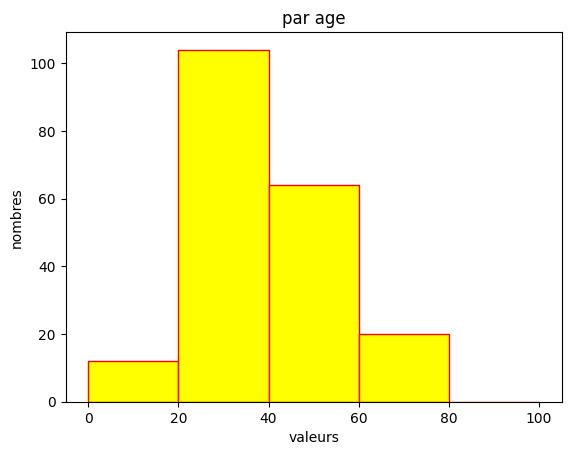

In [ ]:
#matplotlib
x=data_clients.iloc[:,[1]]

plt.hist(x, range = (0, 100), bins = 5, color = 'yellow',
            edgecolor = 'red')
plt.xlabel('valeurs')
plt.ylabel('nombres')
plt.title('par age')
#gsize=(2, 2))"""
#----


<Figure size 200x200 with 0 Axes>

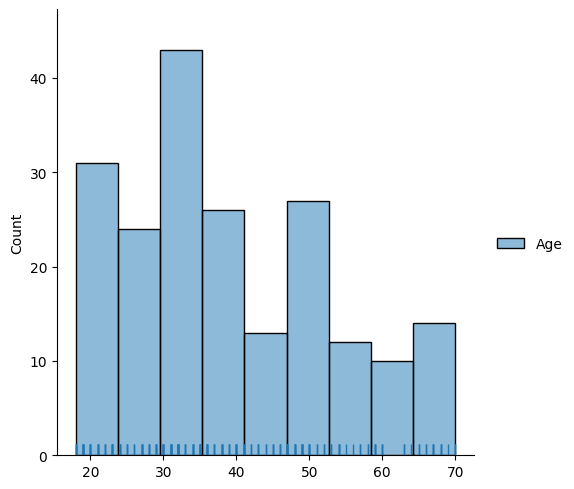

<Figure size 200x200 with 0 Axes>

In [ ]:
#seaborn
x=data_clients.iloc[:,[1]]
plt.figure(figsize=(2, 2))
sns.displot(x, color = 'green', kind = 'hist', rug = True)
plt.figure(figsize=(2, 2))
#-------

plt.show()

#sns.------


**3)** Créer l’**histogramme** et le **diagramme en secteur** pour représenter la distribution des clients par genre dans $data\_clients$

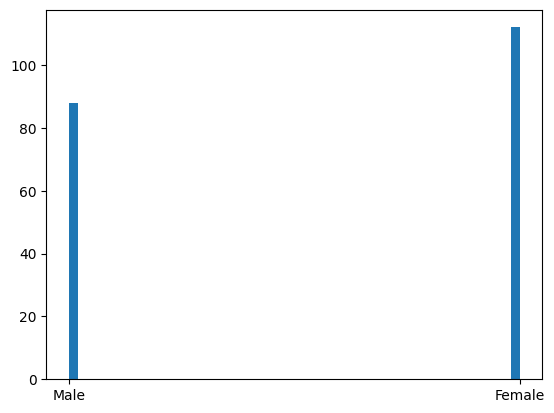

<Figure size 200x200 with 0 Axes>

In [ ]:
#Histogramme de distribution des clients par genre avec matplotlib

x = data_clients.iloc[:,[0]]

# visualisation sur 50 intervalles
plt.hist(x, bins=50)
plt.figure(figsize=(2, 2))
#-----

plt.show()

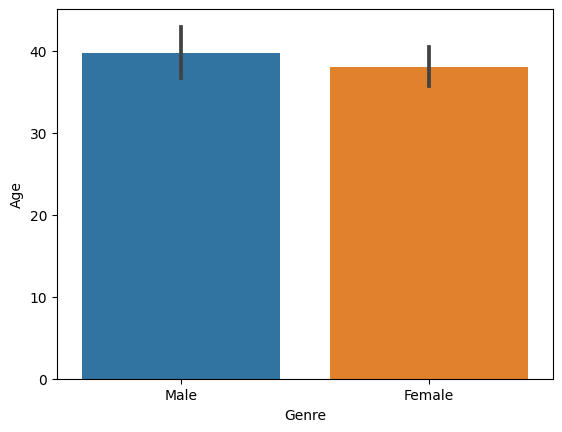

In [ ]:
#Histogramme de distribution des clients par genre avec seaborn
sns.barplot(x = "Genre", y = "Age", data = data_clients);

<Axes: ylabel='Age'>

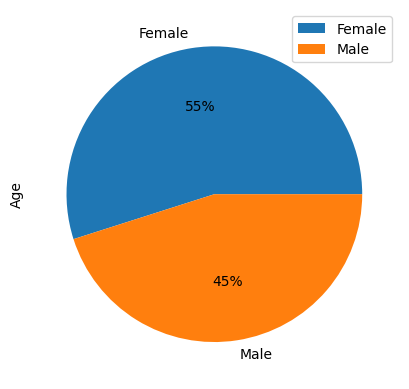

In [ ]:
#Diagramme en secteur de distribution des clients par genre
data_clients.groupby(['Genre']).sum().plot(kind='pie', y='Age', autopct='%1.0f%%')

#plt.show()

**4)** Supprimer la colonne **Age** de $data\_clients$. Afficher $data\_clients$

In [ ]:
#data_clients.------
data_clients.drop(['Age'], axis=1)

,Genre,Annual Income,Spending Score
0,Male,15,39
1,Male,15,81
2,Female,16,6
3,Female,16,77
4,Female,17,40
...,...,...,...
195,Female,120,79
196,Female,126,28
197,Male,126,74
198,Male,137,18


**5)** Normaliser les valeurs des attributs **Annual Income** et **Spending Score** de $data\_clients$ afin de les mettre à l’échelle de $0$ à $1$ (utiliser la classe **<font color='blue'>MinMaxScaler </font>** de la bibliothèque **<font color='blue'>sklearn.preprocessing</font>**)

In [ ]:
minmax_scale = MinMaxScaler().fit(data_clients[['Annual Income', 'Spending Score']])
df_minmax = minmax_scale.transform(data_clients[['Annual Income', 'Spending Score']])

#imprimer un retour à la ligne pour une meilleur clarete de lecture
print('\n********** Normalisation*********\n')

print('Moyenne apres le Min max Scaling :\nMYCT={:.2f}, MMAX={:.2f}'
.format(df_minmax[:,0].mean(), df_minmax[:,1].mean()))

print('\n')

print('Valeur minimale et maximale pour la feature Annual Income apres min max scaling: \nMIN={:.2f}, MAX={:.2f}'
.format(df_minmax[:,0].min(), df_minmax[:,0].max()))

print('\n')

print('Valeur minimale et maximale pour la feature Spending Score apres min max scaling : \nMIN={:.2f}, MAX={:.2f}'
.format(df_minmax[:,1].min(), df_minmax[:,1].max()))


********** Normalisation*********

Moyenne apres le Min max Scaling :
MYCT=0.37, MMAX=0.50


Valeur minimale et maximale pour la feature Annual Income apres min max scaling: 
MIN=0.00, MAX=1.00


Valeur minimale et maximale pour la feature Spending Score apres min max scaling : 
MIN=0.00, MAX=1.00


**6)** 	Transformer l’attribut **Genre** en $2$ variables binaires (**Genre="Male"**, **Genre="Female"**) en utilisant la fonction **<font color='blue'>OneHotEncoder</font>** de la bibliothèque **<font color='blue'>sklearn.preprocessing</font>**. Enregistrer le résultat de la transformation dans un dataframe nommé $data\_trans$

In [ ]:
x = data_clients.iloc[:,[0]]

y = OneHotEncoder().fit_transform(x).toarray()
print(y)


[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


**7)** 	Reconstruire le dataframe $data\_clients$ en concaténant les données transformées en binaire ($data\_trans$) avec les colonnes d’attributs **Annual Income** et **Spending Score**

In [ ]:
#data_clients=pd.concat(--------------------------------)

**8)** 	Transformer les données des colonnes **Annual Income** et **Spending Score** de $data\_clients$ en un tableau *ndarray* nommé $X$. Ensuite, afficher le type et la taille de $X$  

**9)** 	Construire un modèle appelé $km\_model$ en appliquant l’algorithme **Kmeans** sur $X$ avec $K=3$ clusters (utiliser la classe **<font color='blue'>KMeans</font>** de la bibliothèque **<font color='blue'>sklearn.cluster</font>**)

In [ ]:
#km_model=-----

**10)** 	Représenter un scatter plot pour visualiser les observations de $data\_clients$ en fonction de **Annual Income** et **Spending Score**, en marquant les centres des $3$ clusters obtenus par $km\_model$

In [ ]:
#------

#plt.show()

**11)** Déterminer le meilleur choix pour le nombre de clusters $K$ ($K=2...15$) en appliquant **K-means** à $X$. Tracer **deux courbes** sur la même figure :

a.   Une courbe de la **largeur de silhouette** en fonction du **nombre de clusters $K$**

b.   Une courbe de la **somme des carrés des distances intra-cluster (SSE)** en fonction du **nombre de clusters $K$** (**<font color='green'>méthode "elbow"</font>**)

<u>Identifier le meilleur point pour le choix optimal de $K$ sur le graphique</u>


In [ ]:
#------

#plt.show()

**12)** Appliquer l’algorithme **CAH** avec la mesure de distance **"écart usuel moyen"** pour construire un modèle nommé $cah\_model$ à partir de $X$ qui aura pour objectif de diviser les données en $9$ clusters (utiliser la classe **<font color='blue'>AgglomerativeClustering</font>** de la bibliothèque **<font color='blue'>sklearn.cluster</font>**)

In [ ]:
#cah_model= --------------

**13)** 	Déterminer les listes d’indices des observations des $9$ clusters de $cah\_model$ à partir de $X$

**14)** 	Calculer l’**indice de silhouette** de chaque observation en utilisant $cah\_model$, puis afficher-les sous forme d’un tableau unidimensionnel (ndarray)

**14)** Représenter **graphiquement** le **dendrogramme** obtenu en appliquant l'algorithme CAH avec la mesure de distance "écart de ward"

In [ ]:
#plt.figure(figsize=(10, 7))
#plt.title("Dendogram")
#-------

#plt.show()